In [2]:
# Set up working environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import display
from termcolor import colored

print(colored('\nAll libraries imported succesfully.', 'green'))


All libraries imported succesfully.


## Import Dataset

In [3]:
raw_data = pd.read_excel('Concrete_Data.xls') 
display(raw_data)
display()
raw_data.info()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cement                       1030 non-null   float64
 1   BlastFurnaceSlag             1030 non-null   float64
 2   FlyAsh                       1030 non-null   float64
 3   Water                        1030 non-null   float64
 4   Superplasticizer             1030 non-null   float64
 5   CoarseAggregate              1030 non-null   float64
 6   FineAggregate                1030 non-null   float64
 7   Age (day)                    1030 non-null   int64  
 8   ConcreteCompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### First look


 Summary statistics for concrete


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


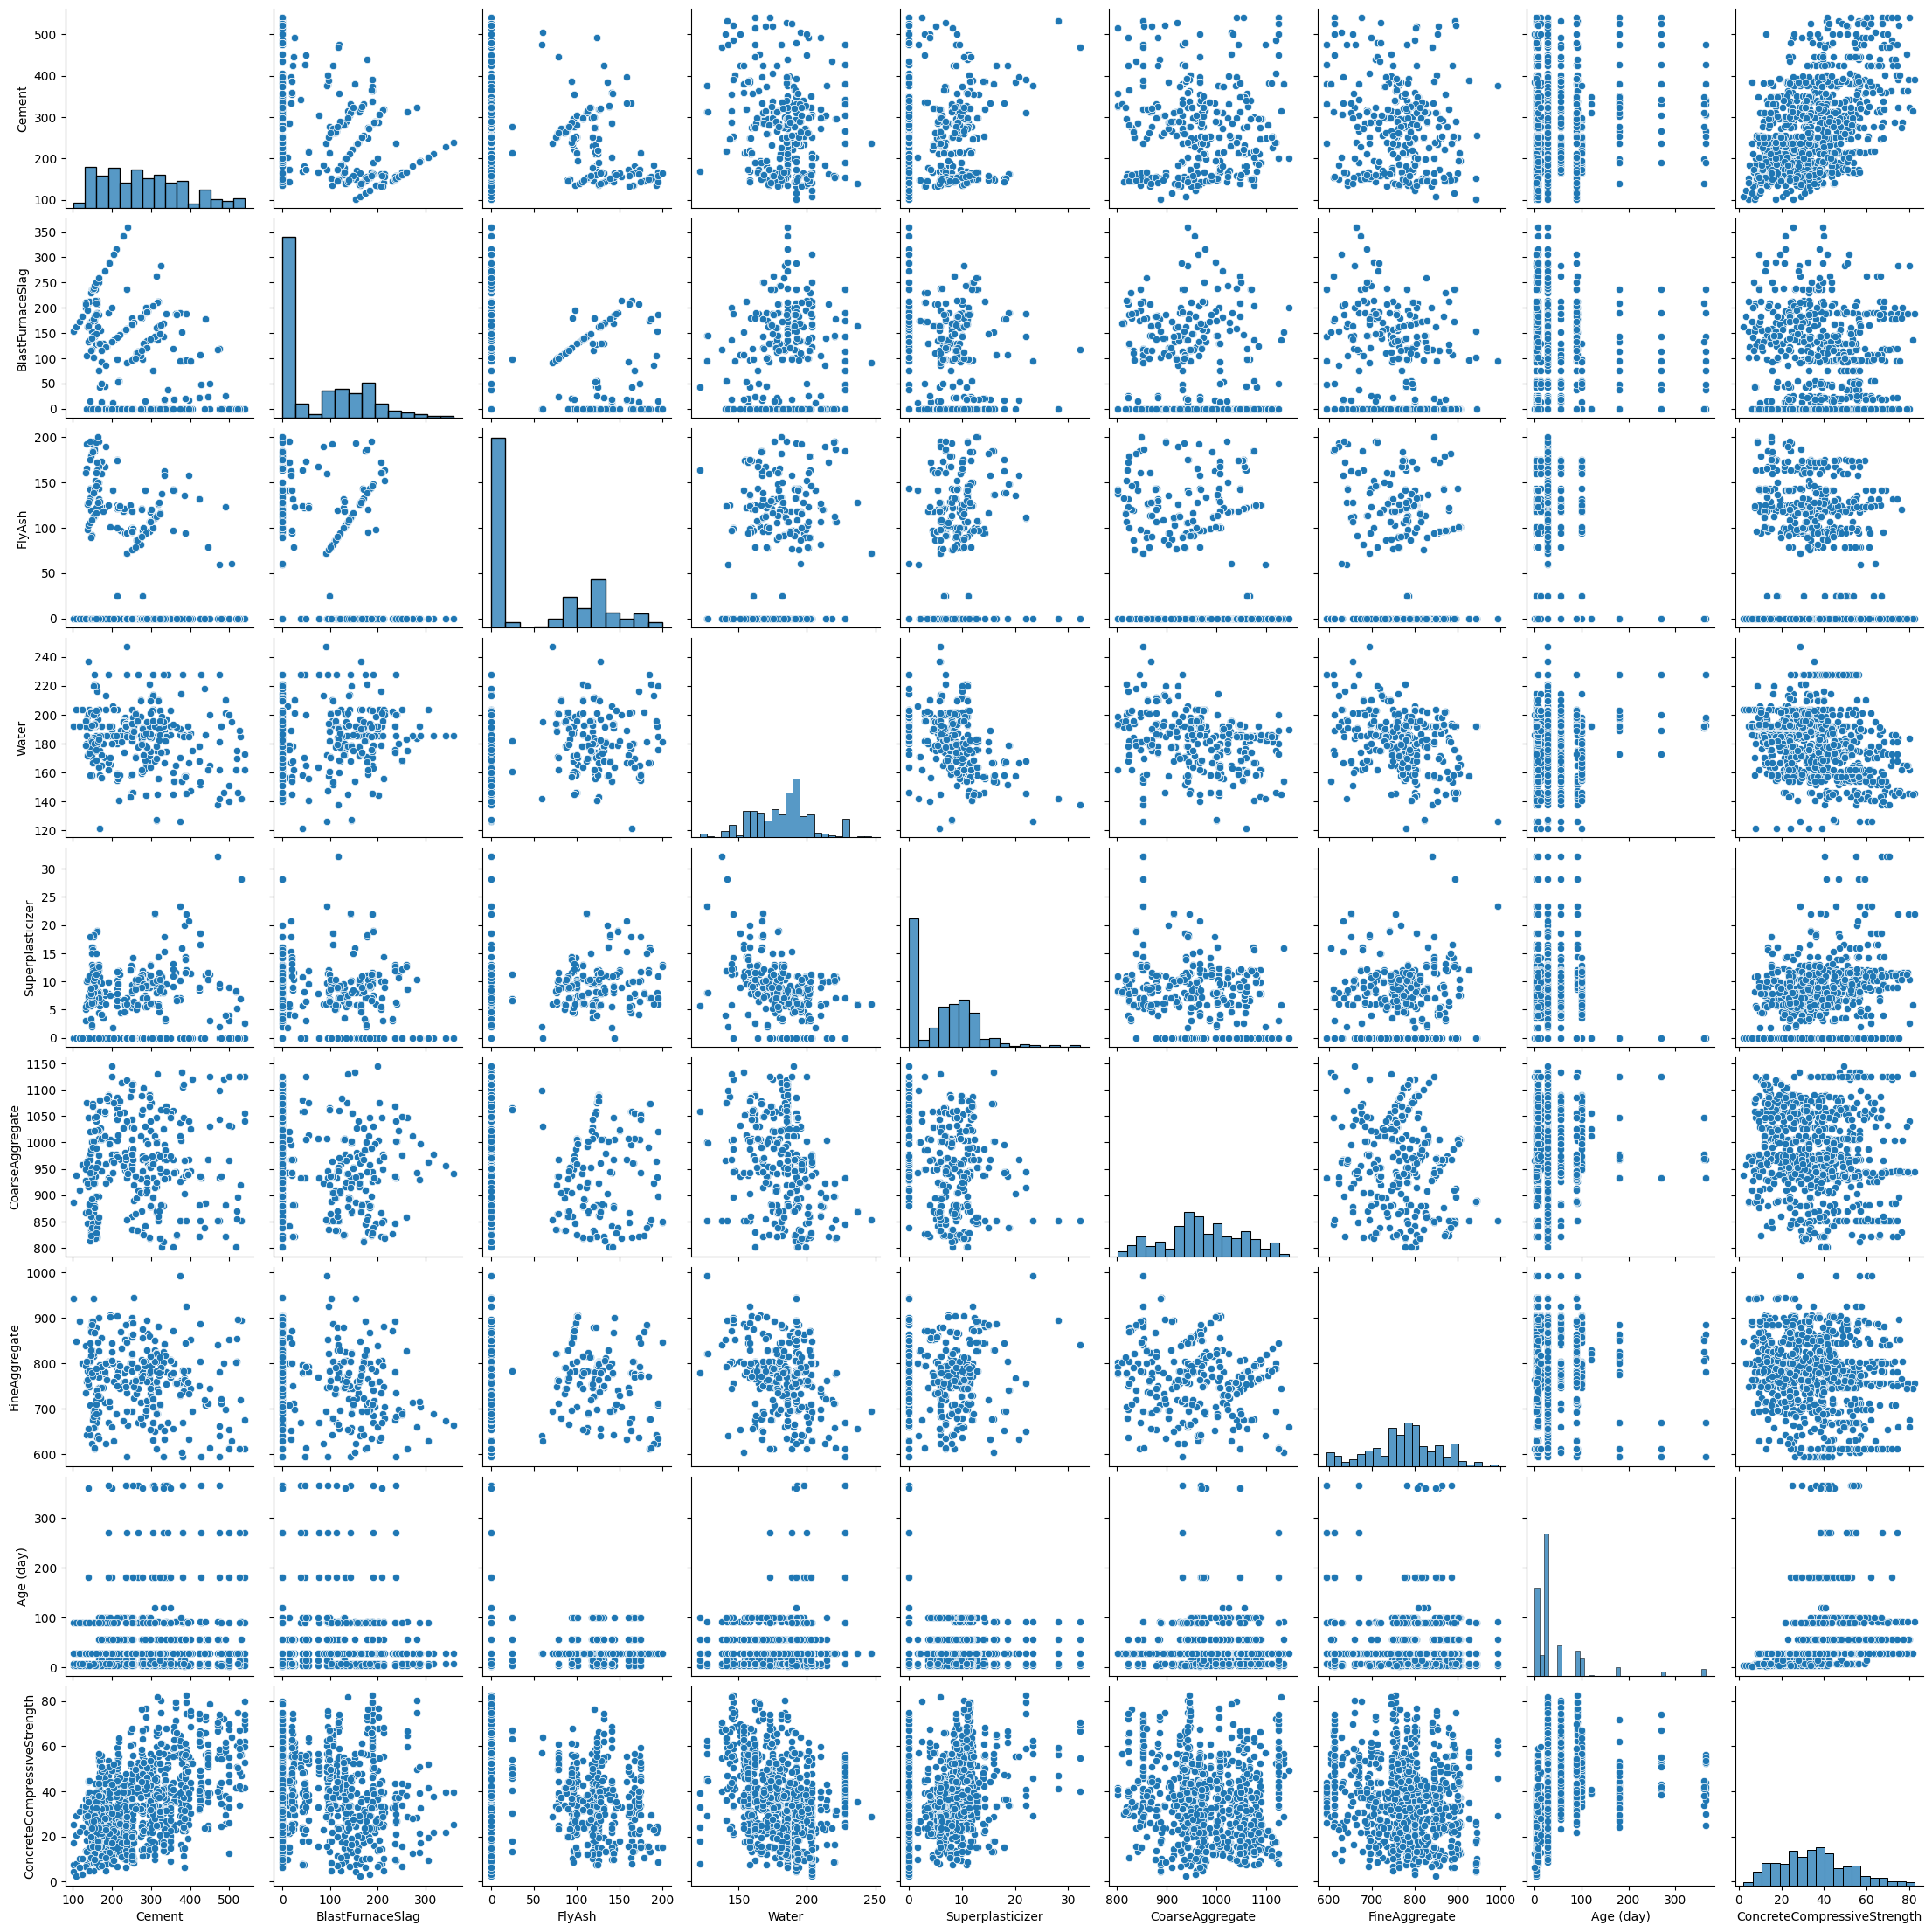

In [4]:
print('\n Summary statistics for concrete')
display(raw_data.describe())

sns.pairplot(raw_data)
plt.show()

Three of the descriptive features have 0 for their minimum and first quartile values. The fact that it is both for the minimum and first quartile indicated that this is perhaps a legitimate measurement, and not missing values or outliers. Perhaps certain compositions of cement do not contain those components.

The data is however in vastly different ranges. They will have to be scaled.

Because there are a large number of non-outlier 0 data, and the distributions of the variables do **not** follow a Gaussian distribution, I will use the min-Max scaler.

In [9]:
#0. Add unique ID to each feature
raw_data['ID'] = raw_data.index.astype(str)
raw_data.head()
#1. Min_Max Scaler over everything except target ('ConcreteCompressionStrength') and ID
target = 'ConcreteCompressiveStrength'
id = 'ID'
scaler = MinMaxScaler()
features = [col for col in raw_data.columns if col != target and col != id]
raw_data[features] = scaler.fit_transform(raw_data[features])
display(raw_data)
scaled_data = raw_data
#2. split into train and test and save to excel files
train_data_control, test_data = train_test_split(scaled_data, test_size=0.3, random_state=42)

train_data_control.to_excel("train_data_control.xlsx", index=False)
test_data.to_excel("test_data.xlsx", index=False)

#3 make 3 compies of training data
train_data_10 = train_data_control.copy()
train_data_40 = train_data_control.copy()
train_data_70 = train_data_control.copy()

train_data = {
    '0.1' : train_data_10,
    '0.4' : train_data_40,
    '0.7' : train_data_70 
    }


#4. introduce missing values to the three compies: 10% missing values, 40% missing values and 70% missing values
miss_percentage = [0.1,0.4,0.7]

for percentage in miss_percentage:
    missing_amount = int(round(percentage*len(train_data_control)))
    # print(missing_amount)
    # get this amount of random indices
    missing_index = np.random.choice(train_data_control.index, size=missing_amount, replace=False)
    # Set values at missing indices to NaN in dataframe that corresponds to percentage
    train_data[str(percentage)].loc[missing_index] = np.nan

    
    # Task 5: Write copies to Excel files
    for percentage, dataframe in train_data.items():

        filename = f'train_data_{percentage}.xlsx'
        dataframe.to_excel(filename, index=False)




,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
0,1.000000,0.000000,0.000000,0.321357,0.077640,0.694767,0.205720,0.074176,79.986111,0
1,1.000000,0.000000,0.000000,0.321357,0.077640,0.738372,0.205720,0.074176,61.887366,1
2,0.526256,0.396494,0.000000,0.848303,0.000000,0.380814,0.000000,0.739011,40.269535,2
3,0.526256,0.396494,0.000000,0.848303,0.000000,0.380814,0.000000,1.000000,41.052780,3
4,0.220548,0.368392,0.000000,0.560878,0.000000,0.515698,0.580783,0.986264,44.296075,4
...,...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461876,0.276398,0.200872,0.437280,0.074176,44.284354,1025
1026,0.502740,0.000000,0.577711,0.592814,0.322981,0.049128,0.550426,0.074176,31.178794,1026
1027,0.106164,0.387869,0.542729,0.566467,0.189441,0.265698,0.466633,0.074176,23.696601,1027
1028,0.130365,0.519477,0.000000,0.429940,0.350932,0.548256,0.488961,0.074176,32.768036,1028


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,0.136986,0.528659,0.739630,0.457086,0.590062,0.107558,0.368791,0.074176,33.756745,830
...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,0.330662,0.000000,0.625087,0.172056,0.372360,0.830814,0.519042,0.035714,42.216615,330
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,0.136986,0.528659,0.739630,0.457086,0.590062,0.107558,0.368791,0.074176,33.756745,830
...,...,...,...,...,...,...,...,...,...,...
87,0.420776,0.558987,0.000000,0.183234,0.347826,0.591860,0.526091,0.005495,24.400556,87
330,0.330662,0.000000,0.625087,0.172056,0.372360,0.830814,0.519042,0.035714,42.216615,330
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,0.136986,0.528659,0.739630,0.457086,0.590062,0.107558,0.368791,0.074176,33.756745,830
...,...,...,...,...,...,...,...,...,...,...
87,0.420776,0.558987,0.000000,0.183234,0.347826,0.591860,0.526091,0.005495,24.400556,87
330,0.330662,0.000000,0.625087,0.172056,0.372360,0.830814,0.519042,0.035714,42.216615,330
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,0.136986,0.528659,0.739630,0.457086,0.590062,0.107558,0.368791,0.074176,33.756745,830
...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,0.330662,0.000000,0.625087,0.172056,0.372360,0.830814,0.519042,0.035714,42.216615,330
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
87,0.420776,0.558987,0.000000,0.183234,0.347826,0.591860,0.526091,0.005495,24.400556,87
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,0.136986,0.528659,0.739630,0.457086,0.590062,0.107558,0.368791,0.074176,33.756745,830
...,...,...,...,...,...,...,...,...,...,...
87,0.420776,0.558987,0.000000,0.183234,0.347826,0.591860,0.526091,0.005495,24.400556,87
330,0.330662,0.000000,0.625087,0.172056,0.372360,0.830814,0.519042,0.035714,42.216615,330
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,0.136986,0.528659,0.739630,0.457086,0.590062,0.107558,0.368791,0.074176,33.756745,830
...,...,...,...,...,...,...,...,...,...,...
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,0.330662,0.000000,0.625087,0.172056,0.372360,0.830814,0.519042,0.035714,42.216615,330
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,0.211598,0.000000,0.502349,0.350259,0.232298,0.597093,0.782489,0.074176,25.724350,196
631,0.509132,0.000000,0.000000,0.497006,0.000000,0.761628,0.474160,0.016484,17.540269,631
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,0.586758,0.052866,0.704648,0.257485,0.338820,0.409884,0.519318,0.005495,23.639177,526
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
87,0.420776,0.558987,0.000000,0.183234,0.347826,0.591860,0.526091,0.005495,24.400556,87
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,0.201689,0.000000,0.625587,0.358164,0.306832,0.808140,0.514049,0.271978,33.563692,466
121,0.851598,0.330551,0.000000,0.473852,0.276398,0.148547,0.470396,0.074176,68.299493,121


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age (day),ConcreteCompressiveStrength,ID
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,0.494977,0.591263,0.000000,0.271058,0.444099,0.148547,0.718515,0.005495,25.200348,81
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
87,0.420776,0.558987,0.000000,0.183234,0.347826,0.591860,0.526091,0.005495,24.400556,87
330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
